# Pauta obligatoria

La entrega debe ser prolija. Sólo se consideran válidos los puntos bien explicados con interpretación personal. No puede haber dos examenes iguales, para esto correremos un parseador de texto para comparar similaridad entre examenes.

El Examen termina 11 am.

# Campañas Online

Una empresa realiza campañas de marketing y posee el siguiente dataset.

**Descargue el dataframe y resuelva:**

https://drive.google.com/file/d/1aFIQO7evLxaUgM5A72ackExN0e6ZKuiS/view?usp=share_link

Descripción de variables:
-> id: id de la campaña
-> valor_de_yen: valor de la moneda yen expresado en otra moneda
-> plataforma : Plataforma de la campaña
	Google
	Facebook	Turbo
-> tipo_campaña : Objetivo de la cmapaña
	Conversion
	Branding
-> conv_rate : Tasa de conversion
-> clicks : Cantidad de clicks
-> type_of_ad : Tipo de anuncio
-> trend : Tendencia de la campaña. Meses que fue exitosa.
-> Cost_per_lead : Costo por lead. Es decir, por cliente que cotiza.
-> spend : Gasto total de la campaña.
-> exito_15 : Exito o no exito de la campaña dos semanas después.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_parquet('campañas_oline.parquet', engine='pyarrow')
df.head()

,Cost_per_lead,Plataforma,clicks,conv_rate,exito_15,spend,tipo_campaña,trend,type_of_ad,id,valor_de_yen
0,2.68,Google,2548,64.1,Exito,5000,Conversion,four,Google,0,19
1,2.68,Google,2548,64.1,Exito,5000,Conversion,four,Google,1,11
2,3.47,Google,2823,65.5,Exito,5000,Conversion,six,Facebook,2,11
3,3.40,Google,2337,None,Exito,5500,Conversion,four,Instagram,3,11
4,3.40,Google,2824,66.4,Exito,5500,Conversion,five,Instagram,4,14


# 1. Evaluación del problema (15pts)
a. ¿Que tipo de modelo recomendaría?
b. Expliqué las razones del tipo de modelo de ML
c. Indique cuál es la variable independiente y dependiente.
d. ¿Cómo se utilizaría la predicción? ¿Que decisión tomaría la empresa?
e. Leyendo el nombre de las variables cuales variables te parece importante ¿Por qué?

## a. ¿Que tipo de modelo recomendaría?

Existe una variable binaria y categorica  llamada "exito_15" que dice si una campaña tuvo exito o no.Por lo tanto, creo que un modelo de regresión logística, podría tratar de predecir si una campaña tiene exito o no.

## b. Expliqué las razones del tipo de modelo de ML

Un modelo de  regresión logistica se utliza cuando la variable dependiente a predecir es una variable binaría, de 1 o 0, si o NO, en este caso, exito o no exito.El modelo crea una sigmoide que tiene una forma de na curva en forma de S que puede tomar cualquier número  y asignarle a un valor entre 0 y 1. (la probabilidad de que tenga exito la campaña).El modelo de clasificación  transforma las probabilidades en clasificaciones,tomando un valor de la curva como limite y dividiendo  en "exito " y "no exito"


## c. Indique cuál es la variable independiente y dependiente.

La variable dependiente es exito_15 y el resto son variables independientes que explican la variable dependiente, es decir, son caracteriísticas del exito de una campaña. Puede ser que no tadas sirvan para explicar la variable dependiente, esto se verá luego.

## d. ¿Cómo se utilizaría la predicción? ¿Que decisión tomaría la empresa?

Segun las variables del dataset, la empresa podría utilizar el modelo para saber si el proximo proyecto de una campaña será beneficioso para la empresa o no y saber que características de una campaña se relacionan con el exito. Podemos intuir que hay  plataformas o tipos  de anuncio que  llevan mas a una campaña al exito que otros.

# 2. Preprocesamiento (30 pts)
a. Analizar faltantes variable a variable. Elegir métodos de imputación o tomar decisiones de dropearlos
b. Analizar valores outliers y repetir el analisis

In [3]:
print(f"El dataset tiene {df.duplicated().sum()} filas duplicadas")

El dataset tiene 0 filas duplicadas


In [4]:
dimensiones = df.shape
print(f'El dataset cuenta con {dimensiones[0]} resgistros y {dimensiones[1]} variables')

El dataset cuenta con 820 resgistros y 11 variables


## a. Analizar faltantes variable a variable. Elegir métodos de imputación o tomar decisiones de dropearlos

In [5]:
def percentageOfnull(df):
    nan_count = df.isna().sum().sort_values(ascending=False)
    nan_percentage = ((df.isna().sum()/df.isna().count())*100).sort_values(ascending=False)
    train_test_dtype = df.dtypes
    df_info = pd.concat([nan_count,nan_percentage,train_test_dtype],axis=1,keys=['Null Count','Null Percentage','DataTypes'])
    return df_info[df_info['Null Count']>0]
percentageOfnull(df)

,Null Count,Null Percentage,DataTypes
tipo_campaña,40,4.878049,object
conv_rate,8,0.975610,object


In [6]:
df[df.tipo_campaña.isna()]

,Cost_per_lead,Plataforma,clicks,conv_rate,exito_15,spend,tipo_campaña,trend,type_of_ad,id,valor_de_yen
14,3.19,Google,10000000,66.9,Exito,4250,None,six,Instagram,14,14
18,3.03,Google,1488,60.3,No Exito,5100,None,three,Youtube,18,12
54,3.15,Google,1950,64.2,No Exito,5000,None,four,Instagram,54,18
68,3.64,Facebook,3750,70.3,Exito,4350,None,five,Instagram,68,10
106,3.27,Google,3139,67.9,Exito,5200,None,six,Facebook,106,13
113,2.19,Google,3285,68.4,Exito,5000,None,four,Youtube,113,19
139,2.64,Google,2120,63.6,No Exito,4400,None,four,Linkedin,139,10
165,3.08,Google,2265,64,No Exito,6600,None,four,Google,165,11
186,3.40,Google,2275,65.5,No Exito,5250,None,four,Instagram,186,19
196,3.15,Google,2935,67.2,Exito,5400,None,four,Instagram,196,19


Hay solo dos variables con datos nulos.Ambas representan un porcentaje bajo del dataset. Veremos cada una por separado

In [7]:
df.tipo_campaña.value_counts()

Conversion    768
Branding       12
Name: tipo_campaña, dtype: int64

Debido a que la mayoría de los valores son de conversión. Podríamos imputar los 40 nulos por  conversión

In [8]:
from sklearn.impute import SimpleImputer
tipo_imp = SimpleImputer(strategy="most_frequent")
tipo_imp.fit(df[['tipo_campaña']])
df['tipo_campaña'] = tipo_imp.transform(df[['tipo_campaña']])

In [9]:
df[df.conv_rate.isna()]

,Cost_per_lead,Plataforma,clicks,conv_rate,exito_15,spend,tipo_campaña,trend,type_of_ad,id,valor_de_yen
3,3.4,Google,2337,None,Exito,5500,Conversion,four,Instagram,3,11
7,3.4,Google,2954,None,Exito,5500,Conversion,five,Instagram,7,10
236,3.4,Google,2400,None,Exito,5512,Conversion,four,Instagram,236,12
401,3.4,Google,3005,None,Exito,5510,Conversion,five,Instagram,401,12
455,3.4,Google,2386,None,Exito,5573,Conversion,four,Instagram,455,16
461,3.4,Google,3034,None,Exito,5544,Conversion,five,Instagram,461,10
637,3.4,Google,3037,None,Exito,5551,Conversion,five,Instagram,637,18
804,3.4,Google,2433,None,Exito,5597,Conversion,four,Instagram,804,13


In [10]:
df.conv_rate.value_counts()

63.8    96
66.5    92
65.4    60
63.6    40
64.4    40
68.4    40
64      36
65.5    32
65.2    28
64.2    24
65.6    24
67.2    24
66.3    24
66.9    20
67.9    20
*       16
64.8    16
65.7    16
68.9    16
70.3    12
65      12
63.9    12
71.7    12
67.7     8
68.3     8
64.1     8
64.6     8
71.4     8
72.3     4
66.4     4
70.9     4
60.3     4
63.4     4
66.6     4
66.1     4
70.5     4
66       4
61.8     4
69.6     4
70.6     4
68       4
72       4
68.8     4
Name: conv_rate, dtype: int64

El tipo de dato de  conv rate es object cuando debería ser int, eso es porque existe un valor "*" que es incorecto.
Vamos a reemplazar el * por nulos

In [11]:
df.conv_rate.replace('*',np.nan, inplace=True)

In [12]:
df.conv_rate.isnull().sum()

24

In [13]:
df.conv_rate.value_counts()

63.8    96
66.5    92
65.4    60
68.4    40
63.6    40
64.4    40
64      36
65.5    32
65.2    28
64.2    24
65.6    24
67.2    24
66.3    24
66.9    20
67.9    20
64.8    16
68.9    16
65.7    16
65      12
63.9    12
70.3    12
71.7    12
68.3     8
67.7     8
64.1     8
64.6     8
71.4     8
72.3     4
66.4     4
70.9     4
60.3     4
63.4     4
66.6     4
66.1     4
70.5     4
66       4
61.8     4
69.6     4
70.6     4
68       4
72       4
68.8     4
Name: conv_rate, dtype: int64

Al ser solo 24 datos, y los valores estan en un rango entre 60 y 70 aproximadamente, voy a imputar los nulos por la mediana.


In [14]:
from sklearn.impute import SimpleImputer
rate_imp = SimpleImputer(strategy="median")
rate_imp.fit(df[['conv_rate']])
df['conv_rate'] = rate_imp.transform(df[['conv_rate']])

## b-Analizar valores outliers y repetir el analisis

primero veremos los tipos de datps de las variables


In [15]:
df.dtypes

Cost_per_lead    float64
Plataforma        object
clicks             int64
conv_rate        float64
exito_15          object
spend              int64
tipo_campaña      object
trend             object
type_of_ad        object
id                 int64
valor_de_yen       int64
dtype: object

In [16]:
df.id=df.id.astype(object)

Trend debería ser fecha ya que sn los meses en que la campaña fue exitosa

In [17]:
df.trend.value_counts()

four      636
six        96
five       44
eight      20
two        16
three       4
twelve      4
Name: trend, dtype: int64

In [18]:
df['trend']=df['trend'].apply(lambda x: 2 if x =='two'
              else 3 if x =="three"
              else 4 if x == 'four'
              else 5 if x == 'five'
              else 6 if x == 'six'
              else 8 if x == 'eight'
              else 12 if x == 'twelve'
              else x)

In [19]:
df

,Cost_per_lead,Plataforma,clicks,conv_rate,exito_15,spend,tipo_campaña,trend,type_of_ad,id,valor_de_yen
0,2.68,Google,2548,64.1,Exito,5000,Conversion,4,Google,0,19
1,2.68,Google,2548,64.1,Exito,5000,Conversion,4,Google,1,11
2,3.47,Google,2823,65.5,Exito,5000,Conversion,6,Facebook,2,11
3,3.40,Google,2337,65.5,Exito,5500,Conversion,4,Instagram,3,11
4,3.40,Google,2824,66.4,Exito,5500,Conversion,5,Instagram,4,14
...,...,...,...,...,...,...,...,...,...,...,...
815,3.47,Google,2889,65.5,Exito,5083,Conversion,6,Facebook,815,10
816,3.15,Google,3002,67.2,Exito,5439,None,4,Instagram,816,10
817,3.46,Facebook,2461,65.4,No Exito,5535,Conversion,4,Instagram,817,13
818,3.15,Google,1978,64.2,No Exito,5010,Conversion,4,Instagram,818,12


In [20]:
df.describe()

,Cost_per_lead,clicks,conv_rate,spend,trend,valor_de_yen
count,8.200000e+02,8.200000e+02,820.000000,8.200000e+02,820.000000,820.000000
mean,1.219515e+06,1.479542e+04,65.876585,1.735482e+04,4.380488,14.279268
std,3.492151e+07,3.491246e+05,2.071644,3.490351e+05,1.078872,2.828222
min,2.070000e+00,1.488000e+03,60.300000,0.000000e+00,2.000000,10.000000
25%,3.110000e+00,2.204000e+03,64.200000,4.850000e+03,4.000000,12.000000
50%,3.290000e+00,2.486000e+03,65.500000,5.200000e+03,4.000000,14.000000
75%,3.410000e+00,2.979500e+03,66.500000,5.501000e+03,4.000000,17.000000
max,1.000000e+09,1.000000e+07,72.300000,1.000000e+07,12.000000,19.000000


### Cost per lead

<AxesSubplot:ylabel='Cost_per_lead'>

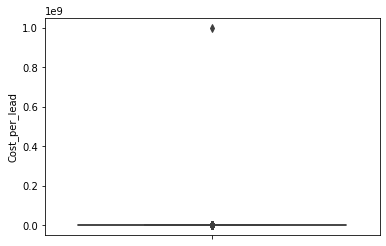

In [21]:
sns.boxplot(data=df,y='Cost_per_lead')

In [22]:
df.nlargest(5,'Cost_per_lead').round()

,Cost_per_lead,Plataforma,clicks,conv_rate,exito_15,spend,tipo_campaña,trend,type_of_ad,id,valor_de_yen
24,999999999.0,Google,1967,64.0,No Exito,0,Conversion,4,Instagram,24,15
47,4.0,Google,4066,70.0,Exito,4750,Conversion,6,Google,47,19
48,4.0,Google,4066,66.0,Exito,4750,Conversion,6,Google,48,15
300,4.0,Google,4124,70.0,Exito,4788,Conversion,6,Google,300,11
343,4.0,Google,4094,66.0,Exito,4846,Conversion,6,Google,343,14


Existe un valor atípico que sera eliminado ya que se separa  mucho de los otros datpos y sebe ser un error

In [23]:
df.drop([24],inplace=True)

### Clicks

<AxesSubplot:ylabel='clicks'>

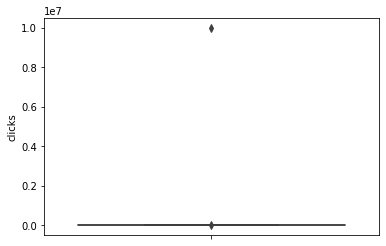

In [24]:
sns.boxplot(data=df,y='clicks')

In [25]:
df.nlargest(5,'clicks')

,Cost_per_lead,Plataforma,clicks,conv_rate,exito_15,spend,tipo_campaña,trend,type_of_ad,id,valor_de_yen
14,3.19,Google,10000000,66.9,Exito,4250,None,6,Instagram,14,14
613,4.17,Google,4181,65.5,Exito,4902,Conversion,6,Google,613,16
796,4.17,Google,4141,69.6,Exito,4826,Conversion,6,Google,796,12
412,4.17,Google,4133,65.5,Exito,4798,Conversion,6,Google,412,11
300,4.17,Google,4124,69.6,Exito,4788,Conversion,6,Google,300,11


Clicks presenta un outlier que sera eliminado por las mismas razones que ele anterior

In [26]:
df.drop([14], inplace=True)

### Conv_rate

<AxesSubplot:ylabel='conv_rate'>

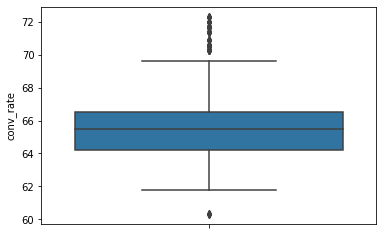

In [27]:
sns.boxplot(data=df,y='conv_rate')

In [28]:
df.nlargest(15,'conv_rate')

,Cost_per_lead,Plataforma,clicks,conv_rate,exito_15,spend,tipo_campaña,trend,type_of_ad,id,valor_de_yen
129,3.11,Google,3366,72.3,Exito,5750,Conversion,8,Pinterest,129,19
351,3.11,Google,3427,72.3,Exito,5810,Conversion,8,Pinterest,351,15
442,3.11,Google,3438,72.3,Exito,5764,Conversion,8,Pinterest,442,16
549,3.11,Google,3474,72.3,Exito,5908,Conversion,8,Pinterest,549,12
74,3.35,Google,3715,72.0,Exito,4500,Conversion,8,Facebook,74,18
228,3.35,Google,3770,72.0,Exito,4534,Conversion,8,Facebook,228,17
433,3.35,Google,3792,72.0,Exito,4506,Conversion,8,Facebook,433,17
669,3.35,Google,3849,72.0,Exito,4628,Conversion,8,Facebook,669,14
70,3.64,Facebook,3770,71.7,Exito,4350,Conversion,5,Instagram,70,14
71,3.10,Google,3740,71.7,Exito,4750,Conversion,8,Facebook,71,12


Esta variable presenta otliers pero como no muestran ser valores fuera de los normal, no serán eliminados

### spend

<AxesSubplot:ylabel='spend'>

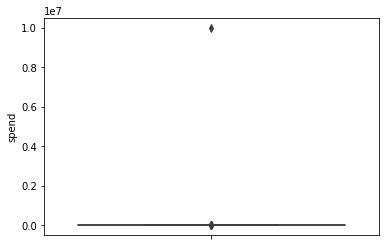

In [29]:
sns.boxplot(data=df,y='spend')

In [30]:
df.nlargest(5,'spend')

,Cost_per_lead,Plataforma,clicks,conv_rate,exito_15,spend,tipo_campaña,trend,type_of_ad,id,valor_de_yen
55,3.255,Google,2380,65.7,Exito,10000000,Conversion,2,Twitter,55,14
610,3.080,Google,2398,64.0,No Exito,6715,None,4,Google,610,13
616,3.080,Google,2395,64.0,No Exito,6687,Conversion,4,Google,616,11
479,3.080,Google,2442,64.0,No Exito,6646,Conversion,4,Google,479,12
307,3.080,Google,2350,64.0,No Exito,6637,None,4,Google,307,18


Spend tiene un outlier alto que sera eliminado porque debe ser un error

In [31]:
df.drop([55],inplace=True)

### trend

<AxesSubplot:ylabel='trend'>

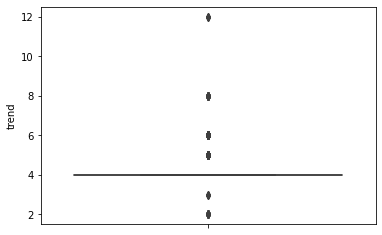

In [32]:
sns.boxplot(data=df,y='trend')

In [33]:
df.trend.value_counts()

4     635
6      95
5      44
8      20
2      15
3       4
12      4
Name: trend, dtype: int64

Los valores de trend son meses y como estan todos dentro de 1 y 12 , son valores correctos y no se eliminarían. Habría que ver poque tantas campañas son en abril y tan pocas en diciembre

### Valor del yen

<AxesSubplot:ylabel='valor_de_yen'>

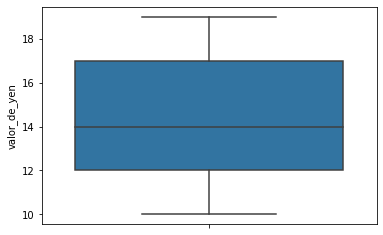

In [34]:
sns.boxplot(data=df,y='valor_de_yen')

In [35]:
df.nlargest(5,'valor_de_yen')

,Cost_per_lead,Plataforma,clicks,conv_rate,exito_15,spend,tipo_campaña,trend,type_of_ad,id,valor_de_yen
0,2.68,Google,2548,64.1,Exito,5000,Conversion,4,Google,0,19
6,3.40,Google,2844,71.4,No Exito No Exito,5500,Conversion,5,Instagram,6,19
25,3.23,Google,1989,63.8,No Exito,5500,Conversion,4,Instagram,25,19
47,4.17,Google,4066,69.6,Exito,4750,Conversion,6,Google,47,19
51,3.15,Google,1900,64.2,No Exito,5000,Conversion,4,Instagram,51,19


Valor de yen esta libre de outliers

# 3. Ploteo y escalado (20 pts)
a. Plotear y analizar distribuciones.
b. Elegir un método de escalado

Transformar valores numéricos continuos en un rango común más chico para una mejor intrepretación del modelo.

In [36]:
import matplotlib.pyplot as plt
def data_dist(df,var):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].set_title(f"Distribucion de {var}")
    sns.histplot(data=df, x=f"{var}", kde=True, ax=ax[0])

    ax[1].set_title(f"Boxplot de{var}")
    sns.boxplot(data=df, x=f"{var}", ax=ax[1])


Funcion usada para plotear dist y analizar sus outliers para elegir un escalado

## Cost per lead

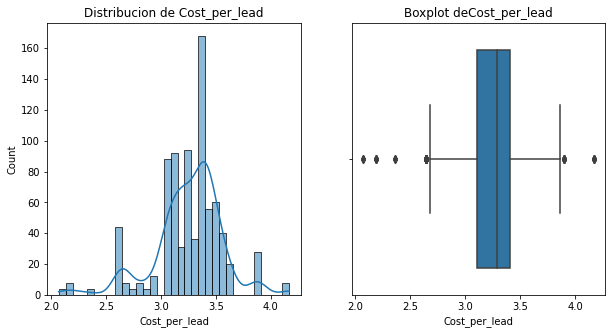

In [37]:
data_dist(df,'Cost_per_lead')

Al ser una distribucion normal con outliers voy a usar un robust scaler

In [38]:
from sklearn.preprocessing import RobustScaler
rb_scaler = RobustScaler()
df['Cost_per_lead'] = rb_scaler.fit_transform(df[['Cost_per_lead']])
df.head()


,Cost_per_lead,Plataforma,clicks,conv_rate,exito_15,spend,tipo_campaña,trend,type_of_ad,id,valor_de_yen
0,-2.033333,Google,2548,64.1,Exito,5000,Conversion,4,Google,0,19
1,-2.033333,Google,2548,64.1,Exito,5000,Conversion,4,Google,1,11
2,0.600000,Google,2823,65.5,Exito,5000,Conversion,6,Facebook,2,11
3,0.366667,Google,2337,65.5,Exito,5500,Conversion,4,Instagram,3,11
4,0.366667,Google,2824,66.4,Exito,5500,Conversion,5,Instagram,4,14


## Clicks

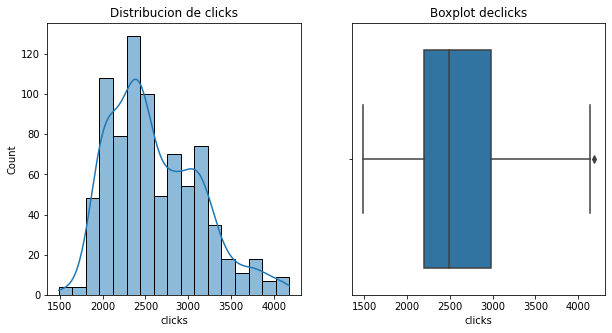

In [39]:
data_dist(df,'clicks')

In [40]:
df.clicks.describe()

count     817.000000
mean     2604.527540
std       520.790427
min      1488.000000
25%      2204.000000
50%      2487.000000
75%      2979.000000
max      4181.000000
Name: clicks, dtype: float64

Al ser una distribucion normal con outliers uso un escalado robusto

In [41]:
from sklearn.preprocessing import RobustScaler
rb_scaler = RobustScaler()
df['clicks'] = rb_scaler.fit_transform(df[['clicks']])
df.head()


,Cost_per_lead,Plataforma,clicks,conv_rate,exito_15,spend,tipo_campaña,trend,type_of_ad,id,valor_de_yen
0,-2.033333,Google,0.078710,64.1,Exito,5000,Conversion,4,Google,0,19
1,-2.033333,Google,0.078710,64.1,Exito,5000,Conversion,4,Google,1,11
2,0.600000,Google,0.433548,65.5,Exito,5000,Conversion,6,Facebook,2,11
3,0.366667,Google,-0.193548,65.5,Exito,5500,Conversion,4,Instagram,3,11
4,0.366667,Google,0.434839,66.4,Exito,5500,Conversion,5,Instagram,4,14


## Conv_rate

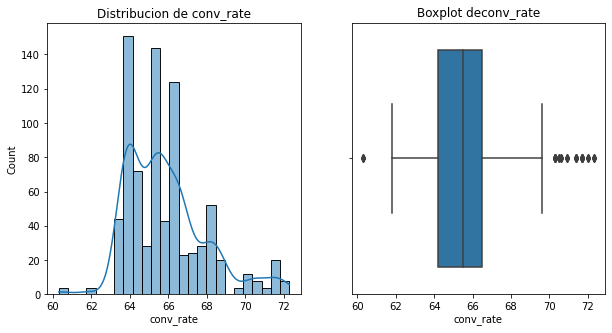

In [42]:
data_dist(df,'conv_rate')

Al ser una distribución normal con oultiers , uso  u escalado robusto

In [43]:
from sklearn.preprocessing import RobustScaler
rb_scaler = RobustScaler()
df['conv_rate'] = rb_scaler.fit_transform(df[['conv_rate']])
df.head()


,Cost_per_lead,Plataforma,clicks,conv_rate,exito_15,spend,tipo_campaña,trend,type_of_ad,id,valor_de_yen
0,-2.033333,Google,0.078710,-0.608696,Exito,5000,Conversion,4,Google,0,19
1,-2.033333,Google,0.078710,-0.608696,Exito,5000,Conversion,4,Google,1,11
2,0.600000,Google,0.433548,0.000000,Exito,5000,Conversion,6,Facebook,2,11
3,0.366667,Google,-0.193548,0.000000,Exito,5500,Conversion,4,Instagram,3,11
4,0.366667,Google,0.434839,0.391304,Exito,5500,Conversion,5,Instagram,4,14


## Spend

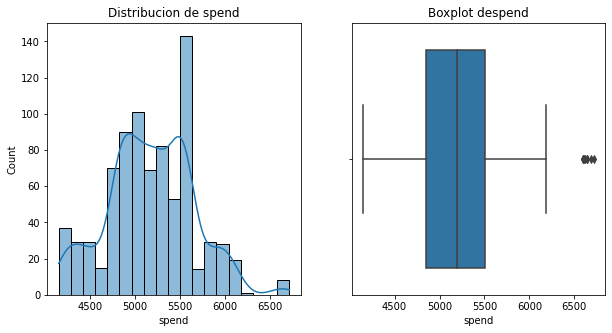

In [44]:
data_dist(df,'spend')

AL ser una distribución normal con outliers , uso un escalado robusto

In [45]:
from sklearn.preprocessing import RobustScaler
rb_scaler = RobustScaler()
df['spend'] = rb_scaler.fit_transform(df[['spend']])
df.head()


,Cost_per_lead,Plataforma,clicks,conv_rate,exito_15,spend,tipo_campaña,trend,type_of_ad,id,valor_de_yen
0,-2.033333,Google,0.078710,-0.608696,Exito,-0.308166,Conversion,4,Google,0,19
1,-2.033333,Google,0.078710,-0.608696,Exito,-0.308166,Conversion,4,Google,1,11
2,0.600000,Google,0.433548,0.000000,Exito,-0.308166,Conversion,6,Facebook,2,11
3,0.366667,Google,-0.193548,0.000000,Exito,0.462250,Conversion,4,Instagram,3,11
4,0.366667,Google,0.434839,0.391304,Exito,0.462250,Conversion,5,Instagram,4,14


## Valor_del_yen

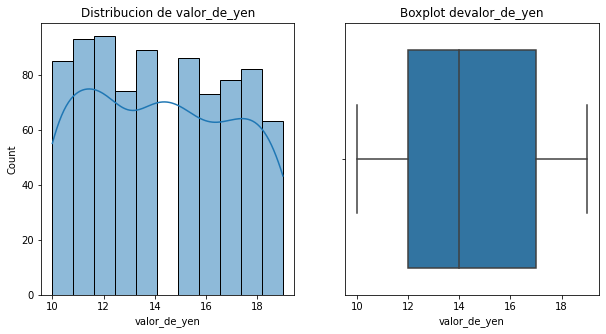

In [46]:
data_dist(df,'valor_de_yen')

Al ser una variable no normal, uso min max scaler

In [47]:
from sklearn.preprocessing import RobustScaler
rb_scaler = RobustScaler()
df['valor_de_yen'] = rb_scaler.fit_transform(df[['valor_de_yen']])
df.head()


,Cost_per_lead,Plataforma,clicks,conv_rate,exito_15,spend,tipo_campaña,trend,type_of_ad,id,valor_de_yen
0,-2.033333,Google,0.078710,-0.608696,Exito,-0.308166,Conversion,4,Google,0,1.0
1,-2.033333,Google,0.078710,-0.608696,Exito,-0.308166,Conversion,4,Google,1,-0.6
2,0.600000,Google,0.433548,0.000000,Exito,-0.308166,Conversion,6,Facebook,2,-0.6
3,0.366667,Google,-0.193548,0.000000,Exito,0.462250,Conversion,4,Instagram,3,-0.6
4,0.366667,Google,0.434839,0.391304,Exito,0.462250,Conversion,5,Instagram,4,0.0


# 5. Variables categoricas (15 pts)
a. Convertir variables categoricas a númericas, aplicar alguna de las tecnicas que vimos.

Para plataforma y type_of_ad voy a convertir cada valor en una columna nueva de 0 y 1

In [48]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['Plataforma']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
platformtype_encoded = ohe.transform(df[['Plataforma']])

df[ohe.get_feature_names_out()] = platformtype_encoded

df.drop(columns='Plataforma', inplace = True)



[array(['Facebook', 'Google'], dtype=object)]

array(['Plataforma_Facebook', 'Plataforma_Google'], dtype=object)

In [49]:

ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['type_of_ad']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
adtype_encoded = ohe.transform(df[['type_of_ad']])

df[ohe.get_feature_names_out()] = adtype_encoded


df.drop(columns='type_of_ad', inplace = True)
df

[array(['Facebook', 'Google', 'Instagram', 'Linkedin', 'Pinterest',
        'Twitter', 'Youtube'], dtype=object)]

array(['type_of_ad_Facebook', 'type_of_ad_Google', 'type_of_ad_Instagram',
       'type_of_ad_Linkedin', 'type_of_ad_Pinterest',
       'type_of_ad_Twitter', 'type_of_ad_Youtube'], dtype=object)

,Cost_per_lead,clicks,conv_rate,exito_15,spend,tipo_campaña,trend,id,valor_de_yen,Plataforma_Facebook,Plataforma_Google,type_of_ad_Facebook,type_of_ad_Google,type_of_ad_Instagram,type_of_ad_Linkedin,type_of_ad_Pinterest,type_of_ad_Twitter,type_of_ad_Youtube
0,-2.033333,0.078710,-0.608696,Exito,-0.308166,Conversion,4,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-2.033333,0.078710,-0.608696,Exito,-0.308166,Conversion,4,1,-0.6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.600000,0.433548,0.000000,Exito,-0.308166,Conversion,6,2,-0.6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.366667,-0.193548,0.000000,Exito,0.462250,Conversion,4,3,-0.6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.366667,0.434839,0.391304,Exito,0.462250,Conversion,5,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,0.600000,0.518710,0.000000,Exito,-0.180277,Conversion,6,815,-0.8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
816,-0.466667,0.664516,0.739130,Exito,0.368259,None,4,816,-0.8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
817,0.566667,-0.033548,-0.043478,No Exito,0.516179,Conversion,4,817,-0.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
818,-0.466667,-0.656774,-0.565217,No Exito,-0.292758,Conversion,4,818,-0.4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [50]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['trend']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
month_encoded = ohe.transform(df[['trend']])

df[ohe.get_feature_names_out()] = month_encoded


df.drop(columns='trend', inplace = True)

[array([ 2,  3,  4,  5,  6,  8, 12], dtype=int64)]

array(['trend_2', 'trend_3', 'trend_4', 'trend_5', 'trend_6', 'trend_8',
       'trend_12'], dtype=object)

In [51]:
df.tipo_campaña.value_counts()

Conversion    766
Branding       12
Name: tipo_campaña, dtype: int64

In [52]:
df.exito_15.value_counts()

No Exito             411
Exito                405
No Exito No Exito      1
Name: exito_15, dtype: int64

se ve que existe un valor no exito no exito , lo cual debe ser una error de haber imoutado " no exito " dos veces, por lo tanto,  reemplazaermos ese valor por " No exito"

In [53]:
df.exito_15.replace("No Exito No Exito","No Exito",inplace= True)

A las variables binarias como  el tipo de campaña  y el target , se transformarán sus valores en 0 y 1.


In [54]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')
df['tipo_campaña'] = binary_encoder.fit_transform(df[['tipo_campaña']])
df['exito_15']= binary_encoder.fit_transform(df[['exito_15']])
df.head()

,Cost_per_lead,clicks,conv_rate,exito_15,spend,tipo_campaña,id,valor_de_yen,Plataforma_Facebook,Plataforma_Google,...,type_of_ad_Pinterest,type_of_ad_Twitter,type_of_ad_Youtube,trend_2,trend_3,trend_4,trend_5,trend_6,trend_8,trend_12
0,-2.033333,0.078710,-0.608696,0.0,-0.308166,0.0,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-2.033333,0.078710,-0.608696,0.0,-0.308166,0.0,1,-0.6,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.600000,0.433548,0.000000,0.0,-0.308166,0.0,2,-0.6,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.366667,-0.193548,0.000000,0.0,0.462250,0.0,3,-0.6,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.366667,0.434839,0.391304,0.0,0.462250,0.0,4,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 6. Modelo base (20 pts)
a. Crear un modelo simple
b. Crear una matriz de confusión.  (Interpretar)
c. Evaluar rendimiento con una métrica

## a. Crear un modelo simple

In [55]:
df.exito_15.value_counts()/len(df)*100

1.0    50.428397
0.0    49.571603
Name: exito_15, dtype: float64

dividimos las variables dependenientes e independiente

In [56]:
X = df.drop(columns=['exito_15','id',])
y = df['exito_15']

In [57]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, )


In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy on test set: ', model.score(X_test, y_test))

Accuracy on test set:  0.9186991869918699


## Confusion matrix


choosing the correct one

In [59]:
yy_true = [0, 1, 0, 1, 0, 1, 0]
yy_pred = [1, 1, 1, 0, 1, 0, 1]

TP (True Positive) = 1

FP (False Positive) = 4

TN (True Negative) = 0

FN (False Negative) = 2

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yy_true, yy_pred)

array([[0, 4],
       [2, 1]], dtype=int64)

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[115,  13],
       [  7, 111]], dtype=int64)

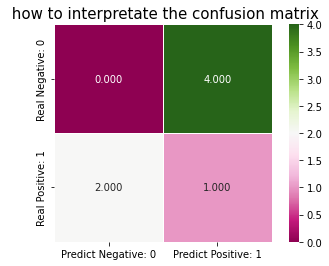

<Figure size 648x648 with 0 Axes>

In [62]:
from sklearn import metrics


cm = metrics.confusion_matrix(yy_true, yy_pred)

all_sample_title =' how to interpretate the confusion matrix'
plt.title(all_sample_title, size=15)
df_cm = pd.DataFrame( data= cm ,index = ['Real Negative: 0', 'Real Positive: 1'],
                  columns = ['Predict Negative: 0', 'Predict Positive: 1'])
matrix=sns.heatmap(df_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='PiYG')
plt.figure(figsize=(9, 9))
plt.show()

If you add labels=[1,0] you get
            TP FP
            FN TN

## Metricas

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       128
         1.0       0.90      0.94      0.92       118

    accuracy                           0.92       246
   macro avg       0.92      0.92      0.92       246
weighted avg       0.92      0.92      0.92       246



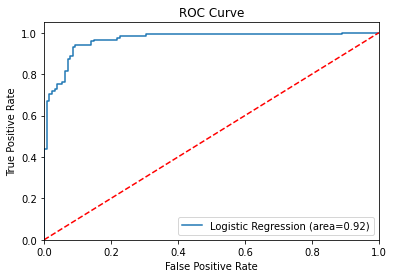

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [66]:
confusion2 = metrics.confusion_matrix(y_test, y_pred )
confusion2

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [67]:
#sensitivity
Recall = TP / float(TP+FN)
print(f"Recall: {Recall.round(2)}")
#specificity
specificity = TN / float(TN+FP)
print(f"Specificity: {specificity.round(2)}")
# false postive rate
fprt = FP/ float(TN+FP)
print(f"False postive rate : {fprt.round(2)}")
# Positive predictive value
ppv = TP / float(TP+FP)
print(f"Precision: {ppv.round(2)}")

Recall: 0.94
Specificity: 0.9
False postive rate : 0.1
Precision: 0.9


In [70]:
##### Chequeo Precision pero con la matriz de confusion
confusion2[1, 1] / (confusion2[0, 1] + confusion2[1, 1])


0.8951612903225806

In [71]:
##### Chequeo el valor de Recall en matriz
confusion2[1, 1] / (confusion2[1, 0] + confusion2[1, 1])


0.940677966101695

In [72]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred))

[0.94262295 0.89516129]
0.8951612903225806


In [73]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred))

[0.8984375  0.94067797]
0.940677966101695


In [77]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=100)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = x_train.columns

smote_data_x,smote_data_y = smote. fit_resample(x_train, y_train)
smote_data_x = pd.DataFrame(data=smote_data_x, columns=columns)
smote_data_y = pd.DataFrame(data=smote_data_y, columns=['exito_15'])


In [79]:
print('Tamaño de la data antes de hacer oversampling: ', len(x_train))
print('Data oversampleada: ', len(smote_data_y))
print('Clientes que no depositaron: ', len(smote_data_y[smote_data_y['exito_15'] == 0]))
print('Clientes que depositaron: ', len(smote_data_y[smote_data_y['exito_15'] == 1]))

Tamaño de la data antes de hacer oversampling:  571
Data oversampleada:  578
Clientes que no depositaron:  289
Clientes que depositaron:  289


# 7. Vizualizaciones

In [ ]:
df= pd.read_parquet('campañas_oline.parquet', engine='pyarrow')
df.head()

In [ ]:
import plotly.express as px
df['exito_15']=1
fig=px.pie(df, names="type_of_ad", values='exito_15',hole=0.6, title="Platforms success")
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_text="success percentage",
                  annotations=[dict(text='platforms', x=0.5, y=0.5, font_size=10, showarrow=False)])

In [ ]:
month=df["trend"].value_counts()
plt.figure(figsize=(20,8))
sns.pointplot(x=month.index, y=month.values, color='violet')
plt.xlabel("Construction year")
plt.ylabel("Count")
plt.title("Construction year", size=30);